# EDA

The goal for this competition is to predict the sale price of houses based on a number of features. There are quite a few features, so it will be challenging to visualize them and decide which to use in our model.

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [118]:
data = pd.read_csv('data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## First look at info(). 
- There are 80 features
- dtypes are int64, float64, and object (ie strings)
- Looks like the majority of features don't have an Nan values, but some few do

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Figure out how to get list of how many nulls each variable has

In [155]:
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

I'd like to get a list of which variables are numeric/not also.

In [120]:
# extract numeric features ?
X = data._get_numeric_data()
X = X.iloc[:,0:-1]
X.drop('Id',axis=1,inplace=True)
X.head()
#X.info()
#X.fillna(method='ffill')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [121]:
# compute correlation of each numeric variable w/ house price
C=X.corr()

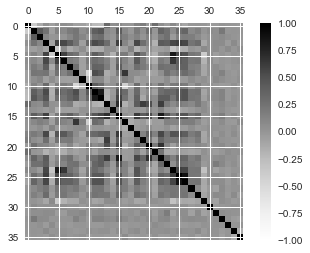

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(C, vmin=-1, vmax=1)
fig.colorbar(cax)
#ticks = np.arange(0,9,1)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

In [152]:
# compute correlation of each variable w/ housing price, and order by magnitude
N = len(X.columns)
cvals = []
for var in range(0,N):
    #print(X.columns[var])
    cvals.append(np.corrcoef(X.iloc[:,var],data['SalePrice'])[0,1])
    
dfC = pd.DataFrame({'vars':X.columns[0:N],'cvals':np.abs(cvals)})
dfC.sort_values('cvals',ascending=False)

,cvals,vars
3,0.790982,OverallQual
15,0.708624,GrLivArea
25,0.640409,GarageCars
26,0.623431,GarageArea
11,0.613581,TotalBsmtSF
12,0.605852,1stFlrSF
18,0.560664,FullBath
22,0.533723,TotRmsAbvGrd
5,0.522897,YearBuilt
6,0.507101,YearRemodAdd


## Features to add?
- years since remodel (=YrSold-YearRemodAdd). The absolute year remodeled probably doesn't matter; how long ago does
- age of house (YrSold-YearBuilt)

## Look at the distribution of the target variable (SalePrice)
- distribution is skewed (has longer tail at large values)
- log10 of SalePrice looks normally dist.

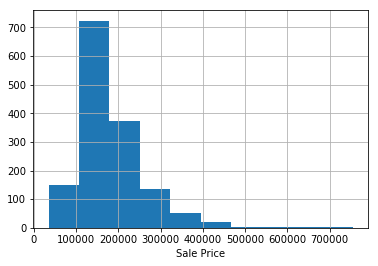

In [8]:
plt.hist(data.SalePrice)
plt.grid()
plt.xlabel('Sale Price')

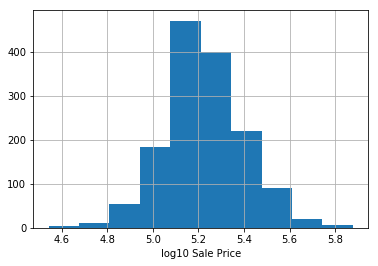

In [9]:
plt.hist(np.log10(data.SalePrice))
plt.grid()
plt.xlabel('log10 Sale Price')

In [10]:
# imputing null values

## Look at non-numeric columns

In [124]:
data_cat = data.loc[:,data.dtypes=='object']
data_cat.head()
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [153]:
# how many of these don't have Nans
data_cat.isnull().sum().sort_values(ascending=False)
#data_cat.isnull().sum()==0

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [126]:
data_cat_nonan = data_cat.loc[:,data_cat.isnull().sum()==0]
data_cat_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
KitchenQual      1460 non-null object
Functional       14

In [127]:
data_cat.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [128]:
data_cat_nonan_dum = pd.get_dummies(data=data_cat_nonan)#,columns=['KitchenQual'])
data_cat_nonan_dum.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Model building

## 1st Model - Do regression w/ just numeric variables
- Ridge and Linear Regression both get accuracies around 72% on test set

In [129]:
# our target variable
#y = data.iloc[:,-1].values
y = data['SalePrice']

r2 for test set : 0.7283665290114809


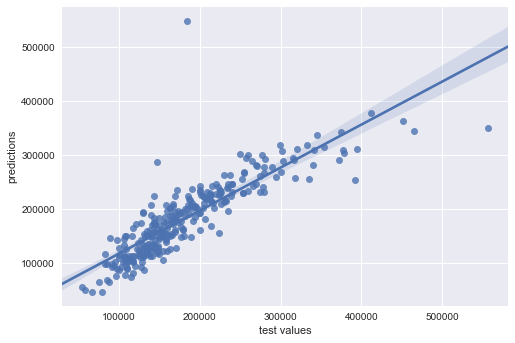

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=37)

#pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , Ridge() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , LassoCV() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , Lasso() ) ])
pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , LinearRegression() ) ])

pipe.fit(X_train,y_train)
preds = pipe.predict(X_test)

#plt.scatter(y_test,preds)
import seaborn as sns
sns.regplot(y_test,preds)
#plt.grid()
plt.xlabel('test values')
plt.ylabel('predictions')
from sklearn.metrics import r2_score
print('r2 for test set : {}' .format(r2_score(y_test,preds)) )

In [57]:
pipe

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [16]:
pipe

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('reg', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [45]:
from sklearn.model_selection import GridSearchCV

params = {'reg__alpha':[0.1, 0.5, 1, 9, 10, 50]}

cv = GridSearchCV(pipe,params)
cv.fit(X_train, y_train)

cv.best_params_

{'reg__alpha': 50}

In [47]:
cv.best_score_

0.79266814834177857

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=37)

pipe = Pipeline(steps=[('imputer' , Imputer()), ('reg' , Ridge() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer()), ('reg' , Lasso() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , Lasso() ) ])
params = {'reg__alpha':[0.1, 0.5, 1, 5, 10, 20],'imputer__strategy':['mean','median']}
cv = GridSearchCV(pipe,params)
cv.fit(X_train, y_train)

cv.best_params_


{'imputer__strategy': 'median', 'reg__alpha': 20}

In [59]:
cv.best_score_

0.79228852593281329

In [74]:
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline(steps=[('imputer' , Imputer()), ('reg' , RandomForestRegressor() ) ])
params = {'reg__n_estimators':[10, 50, 100],'reg__min_samples_leaf':[1,3,5]}
cv = GridSearchCV(pipe,params)
cv.fit(X_train, y_train)
cv.best_params_


{'reg__max_depth': 50, 'reg__min_samples_leaf': 1, 'reg__n_estimators': 100}

In [63]:
pipe

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('reg', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))])

In [75]:
cv.best_score_

0.86837708753765264

## Model w/ numeric and categorical variables

In [130]:
X2 = pd.concat([X,data_cat_nonan_dum],axis=1)

In [132]:
X2.shape
#y.shape

(1460, 218)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.2,random_state=37)

pipe = Pipeline(steps=[('imputer' , Imputer()), ('reg' , Ridge() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer()), ('reg' , Lasso() ) ])
#pipe = Pipeline(steps=[('imputer' , Imputer(strategy='mean')), ('reg' , Lasso() ) ])
params = {'reg__alpha':[1,5,10,20,50],'imputer__strategy':['mean','median']}
cv = GridSearchCV(pipe,params)
cv.fit(X_train, y_train)

cv.best_params_


{'imputer__strategy': 'mean', 'reg__alpha': 10}

In [143]:
cv.best_score_

0.82168041596589603

# Predict on test set and make submission

In [12]:
test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
test = test._get_numeric_data()
pred_out = pipe.predict(test)

In [14]:
results = pd.DataFrame({'Id':test.Id,'SalePrice':pred_out})
results['SalePrice']=results['SalePrice'].clip_lower(0)
results.head()
results.to_csv('results.csv',header=True,index=False)

In [15]:
results.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,173129.564426
std,421.321334,72669.497911
min,1461.000000,0.000000
25%,1825.500000,121544.729666
50%,2190.000000,161768.488480
75%,2554.500000,217832.980238
max,2919.000000,650893.488032
